<a href="https://colab.research.google.com/github/Crispardo06/Parcial_Final_I.A/blob/main/Control_Difuso_para_la_Regulaci%C3%B3n_de_un_Invernadero_Inteligente_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apertura del Ventilador: 50.00%
Apertura del Rociador: 50.00%


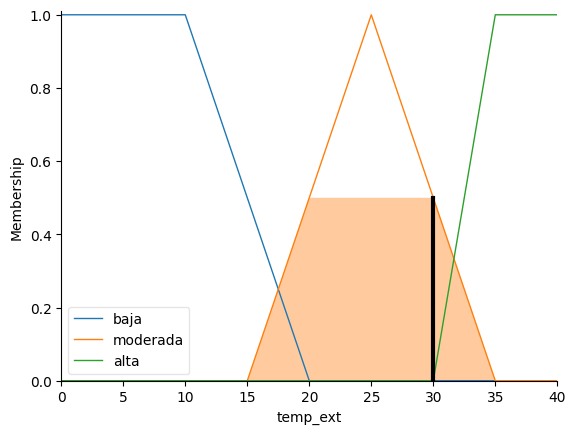

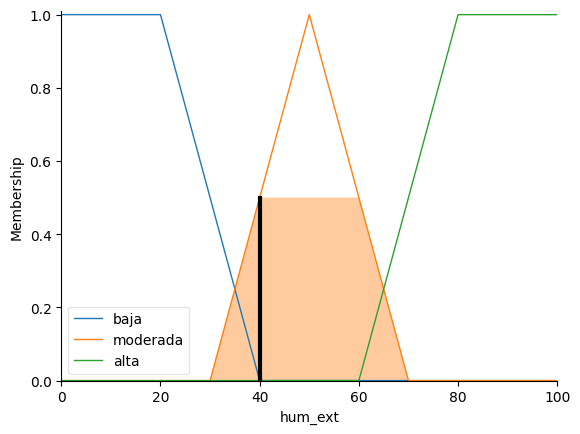

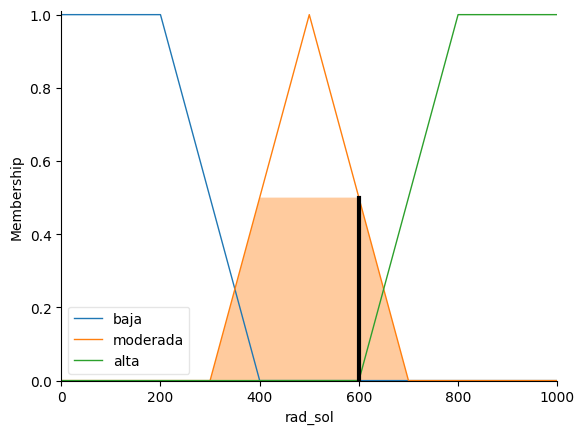

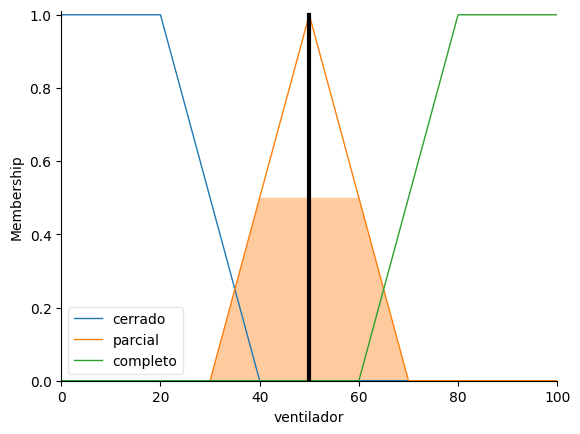

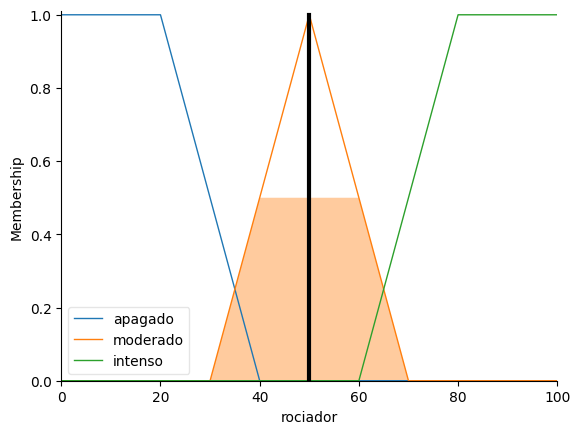

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definición de las variables difusas
# Entradas
temp_ext = ctrl.Antecedent(np.arange(0, 41, 1), 'temp_ext')
hum_ext = ctrl.Antecedent(np.arange(0, 101, 1), 'hum_ext')
rad_sol = ctrl.Antecedent(np.arange(0, 1001, 1), 'rad_sol')

# Salidas
ventilador = ctrl.Consequent(np.arange(0, 101, 1), 'ventilador')
rociador = ctrl.Consequent(np.arange(0, 101, 1), 'rociador')

# Conjuntos difusos para las entradas
temp_ext['baja'] = fuzz.trapmf(temp_ext.universe, [0, 0, 10, 20])
temp_ext['moderada'] = fuzz.trimf(temp_ext.universe, [15, 25, 35])
temp_ext['alta'] = fuzz.trapmf(temp_ext.universe, [30, 35, 40, 40])

hum_ext['baja'] = fuzz.trapmf(hum_ext.universe, [0, 0, 20, 40])
hum_ext['moderada'] = fuzz.trimf(hum_ext.universe, [30, 50, 70])
hum_ext['alta'] = fuzz.trapmf(hum_ext.universe, [60, 80, 100, 100])

rad_sol['baja'] = fuzz.trapmf(rad_sol.universe, [0, 0, 200, 400])
rad_sol['moderada'] = fuzz.trimf(rad_sol.universe, [300, 500, 700])
rad_sol['alta'] = fuzz.trapmf(rad_sol.universe, [600, 800, 1000, 1000])

# Conjuntos difusos para las salidas
ventilador['cerrado'] = fuzz.trapmf(ventilador.universe, [0, 0, 20, 40])
ventilador['parcial'] = fuzz.trimf(ventilador.universe, [30, 50, 70])
ventilador['completo'] = fuzz.trapmf(ventilador.universe, [60, 80, 100, 100])

rociador['apagado'] = fuzz.trapmf(rociador.universe, [0, 0, 20, 40])
rociador['moderado'] = fuzz.trimf(rociador.universe, [30, 50, 70])
rociador['intenso'] = fuzz.trapmf(rociador.universe, [60, 80, 100, 100])

# Reglas difusas
rules = [
    ctrl.Rule(temp_ext['alta'] & hum_ext['baja'] & rad_sol['alta'],
              (ventilador['completo'], rociador['intenso'])),
    ctrl.Rule(temp_ext['moderada'] & hum_ext['moderada'] & rad_sol['baja'],
              (ventilador['parcial'], rociador['apagado'])),
    ctrl.Rule(temp_ext['baja'] & hum_ext['alta'] & rad_sol['baja'],
              (ventilador['cerrado'], rociador['apagado'])),
    ctrl.Rule(temp_ext['alta'] & hum_ext['alta'] & rad_sol['moderada'],
              (ventilador['parcial'], rociador['moderado'])),
    ctrl.Rule(temp_ext['moderada'] & hum_ext['baja'] & rad_sol['moderada'],
              (ventilador['completo'], rociador['moderado'])),
    ctrl.Rule(temp_ext['baja'] & hum_ext['moderada'] & rad_sol['alta'],
              (ventilador['parcial'], rociador['intenso'])),
    ctrl.Rule(temp_ext['alta'] & hum_ext['alta'] & rad_sol['alta'],
              (ventilador['completo'], rociador['apagado'])),
    ctrl.Rule(temp_ext['moderada'] & hum_ext['alta'] & rad_sol['baja'],
              (ventilador['cerrado'], rociador['moderado'])),
    ctrl.Rule(temp_ext['baja'] & hum_ext['baja'] & rad_sol['alta'],
              (ventilador['completo'], rociador['intenso'])),
    ctrl.Rule(temp_ext['moderada'] & hum_ext['moderada'] & rad_sol['moderada'],
              (ventilador['parcial'], rociador['moderado'])),
]

# Crear el sistema de control
ing_control = ctrl.ControlSystem(rules)
ing_sim = ctrl.ControlSystemSimulation(ing_control)

# Simulación de ejemplo
ing_sim.input['temp_ext'] = 30
ing_sim.input['hum_ext'] = 40
ing_sim.input['rad_sol'] = 600

# Calcular
ing_sim.compute()

# Resultados
print(f"Apertura del Ventilador: {ing_sim.output['ventilador']:.2f}%")
print(f"Apertura del Rociador: {ing_sim.output['rociador']:.2f}%")

# Visualización gráfica
temp_ext.view(sim=ing_sim)
hum_ext.view(sim=ing_sim)
rad_sol.view(sim=ing_sim)
ventilador.view(sim=ing_sim)
rociador.view(sim=ing_sim)

plt.show()